In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from prophet import Prophet

In [ ]:
df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/2015_2016_dataset.csv', index_col=0, parse_dates=True)

<ipython-input-4-4b0d35808564>:1: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/2015_2016_dataset.csv', index_col=0, parse_dates=True)


In [ ]:
df = df.asfreq('h')

In [ ]:
df_rs = pd.DataFrame()
df_rs['RSG'] = df['SRGLOAVG1H']#.between_time('08:00:00','17:00:00')

In [ ]:
df_rs.head()

,RSG
Local_Time,
2015-01-01 01:00:00,0.0
2015-01-01 02:00:00,0.0
2015-01-01 03:00:00,0.0
2015-01-01 04:00:00,0.0
2015-01-01 05:00:00,0.0


In [ ]:
df_rs = df_rs.reset_index()
df_rs = df_rs.rename(columns={"Local_Time": "ds", "RSG": "y"})

# Convert 'ds' column to datetime format if necessary
df_rs["ds"] = pd.to_datetime(df_rs["ds"])

In [ ]:
df_rs.head()

,ds,y
0,2015-01-01 01:00:00,0.0
1,2015-01-01 02:00:00,0.0
2,2015-01-01 03:00:00,0.0
3,2015-01-01 04:00:00,0.0
4,2015-01-01 05:00:00,0.0


In [ ]:
train_len = int(len(df_rs)*0.8)

In [ ]:
data_train, data_test = df_rs[:train_len],df_rs[train_len:]

In [ ]:
data_train.shape

(14035, 2)

In [ ]:
model = Prophet()
model.fit(data_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie0_1ws7/uhjgeq5x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpie0_1ws7/lb1fj2vb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39186', 'data', 'file=/tmp/tmpie0_1ws7/uhjgeq5x.json', 'init=/tmp/tmpie0_1ws7/lb1fj2vb.json', 'output', 'file=/tmp/tmpie0_1ws7/prophet_model67skhy7q/prophet_model-20230523002903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = model.make_future_dataframe(periods=70)

In [ ]:
predictions = model.predict(future_dates)

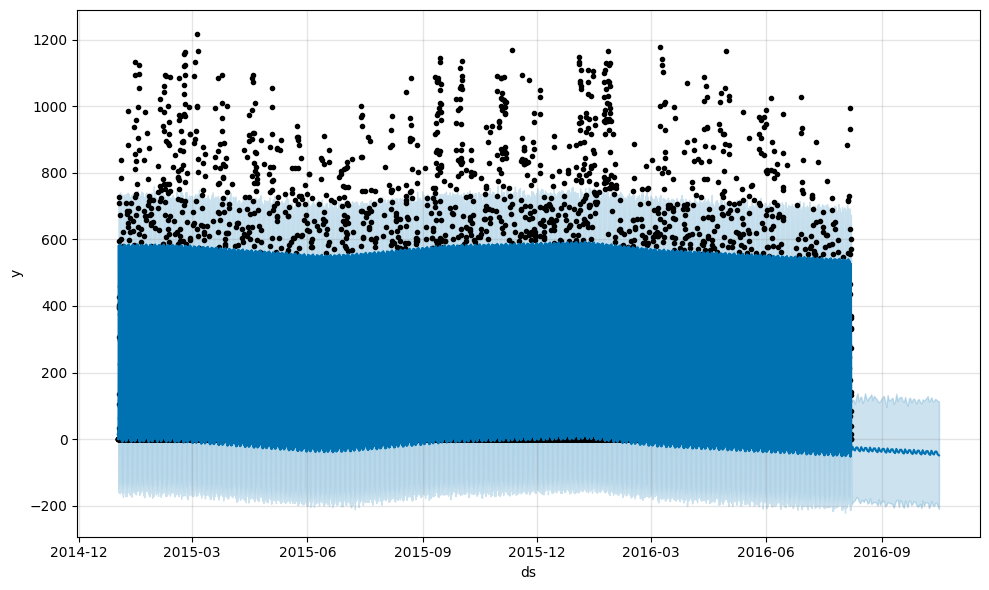

In [ ]:
fig = model.plot(predictions)

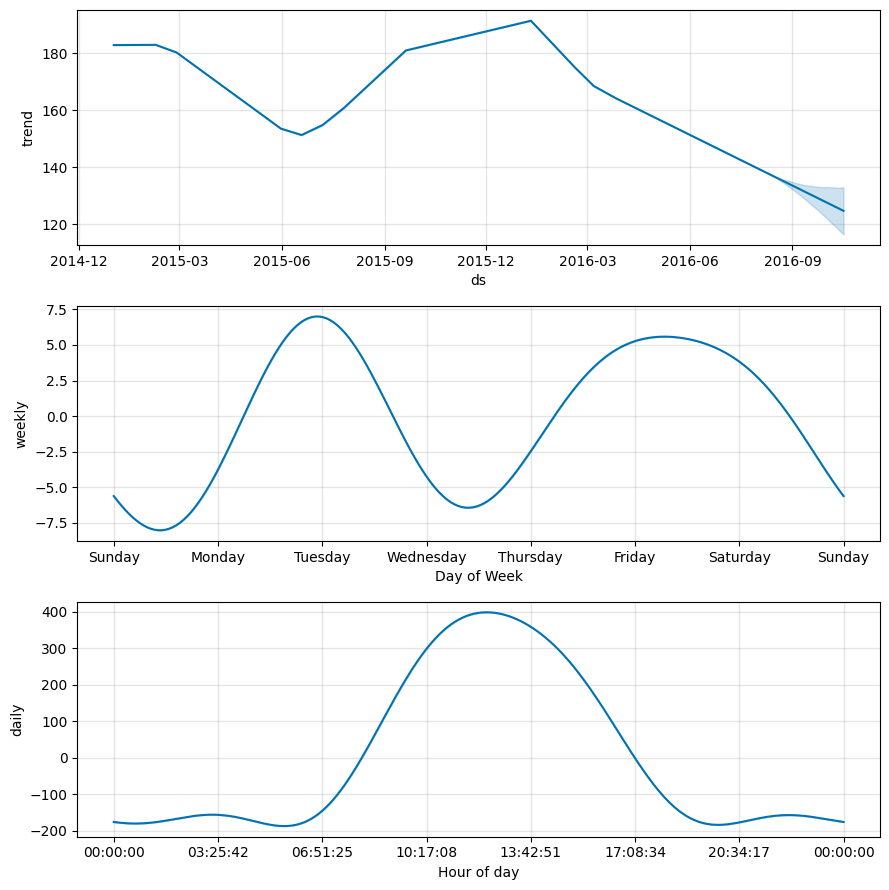

In [ ]:
fig = model.plot_components(predictions)

## Use prophet to predict next hour data

In [ ]:
df_rs = pd.DataFrame()
df_rs['RSG'] = df['SRGLOAVG1H'].between_time('08:00:00','17:00:00')

In [ ]:
df_rs = df_rs.reset_index()
df_rs = df_rs.rename(columns={"Local_Time": "ds", "RSG": "y"})

# Convert 'ds' column to datetime format if necessary
df_rs["ds"] = pd.to_datetime(df_rs["ds"])

In [ ]:
train_len = int(len(df_rs)*0.8)
data_train, data_test = df_rs[:train_len],df_rs[train_len:]

In [ ]:
last_day_data = data_train.tail(10) # data until 1 day ago

In [ ]:
model = Prophet()
model.fit(last_day_data) 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lbwudha/oplkfyfo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3lbwudha/u2m_pwcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13678', 'data', 'file=/tmp/tmp3lbwudha/oplkfyfo.json', 'init=/tmp/tmp3lbwudha/u2m_pwcr.json', 'output', 'file=/tmp/tmp3lbwudha/prophet_modelmwtd_0k5/prophet_model-20230523010215.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:02:15 - cmdstanpy - INFO - Chain [1] start processing
IN

In [ ]:
future_dates = pd.DataFrame({'ds': [last_day_data['ds'].iloc[-1] + pd.DateOffset(hours=1)]})

In [ ]:
predictions = model.predict(future_dates)

In [ ]:
next_hour_prediction = predictions['yhat'].iloc[0]

In [ ]:
next_hour_prediction

369.0084373583572

In [ ]:
data_test.iloc[0]['y']

334.0

Repeat the process test data

In [ ]:
prophet_predictions = []

In [ ]:
data_test.shape

(1462, 2)

In [ ]:
for i in range(len(data_test)-10):
  last_day_data = data_test.iloc[i:i+10]
  model = Prophet()
  model.fit(last_day_data,)
  future_dates = pd.DataFrame({'ds': [last_day_data['ds'].iloc[-1] + pd.DateOffset(hours=1)]})
  predictions = model.predict(future_dates)
  next_hour_prediction = predictions['yhat'].iloc[0]
  prophet_predictions.append(next_hour_prediction)

In [ ]:
len(prophet_predictions)

1452

In [ ]:
len(data_test)

1462

In [ ]:
real_data = data_test.iloc[10:]['y'].values

In [ ]:
len(real_data)

1452

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
errorMSE = mean_squared_error(real_data,prophet_predictions)
errorMAE = mean_absolute_error(real_data,prophet_predictions)
errorMSE = errorMSE
errorRMSE = np.sqrt(errorMSE)

In [ ]:
errorRMSE

325.6778389261135

In [ ]:
errorMAE

273.39483825057556